# Setup and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('HA Data.csv')

In [2]:
df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [4]:
# 1. Handling Missing Values
# The dataset uses '?' to indicate missing values. We replace them with NaN for proper processing.
df.replace('?', np.nan, inplace=True)

In [5]:
df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),NaN,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),NaN,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),NaN,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),NaN,5,NaN,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),NaN,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [6]:
# 2. Normalize Target Variable 'readmitted'
# The dictionary states: <30 days = 1, else = 0.
# We ensure the column is numeric for correlation analysis.
# (Note: In this dataset, the column 'readmitted' is already 0 or 1).
print(f"Unique values in readmitted: {df['readmitted'].unique()}")

Unique values in readmitted: [1 0]


In [7]:
# 3. Handling 'weight'
# Weight is mostly missing (as noted in the case study). We will keep it for specific analysis but note the sparseness.
print(f"Non-null weight entries: {df['weight'].notnull().sum()}")

Non-null weight entries: 2133


# Visualization and Analysis

### 1. Readmission Distribution by Age

Text(0.5, 1.0, 'Q1: Readmission Rate by Age Group')

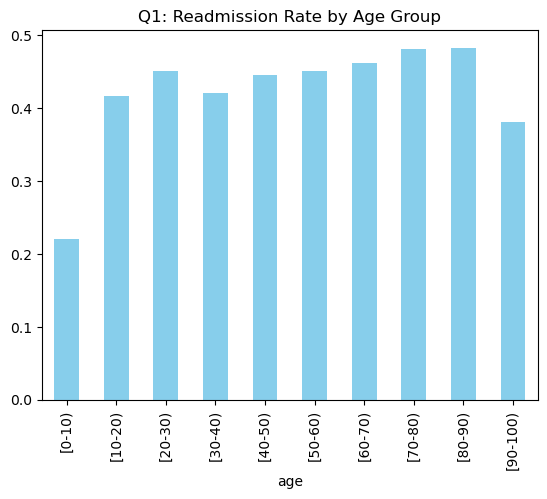

In [9]:
# Group by age and calculate mean readmission rate
age_group = df.groupby('age')['readmitted'].mean()
age_group.plot(kind='bar', color='skyblue')
plt.title('Q1: Readmission Rate by Age Group')

# Length of Stay by Specialty

<Axes: ylabel='medical_specialty'>

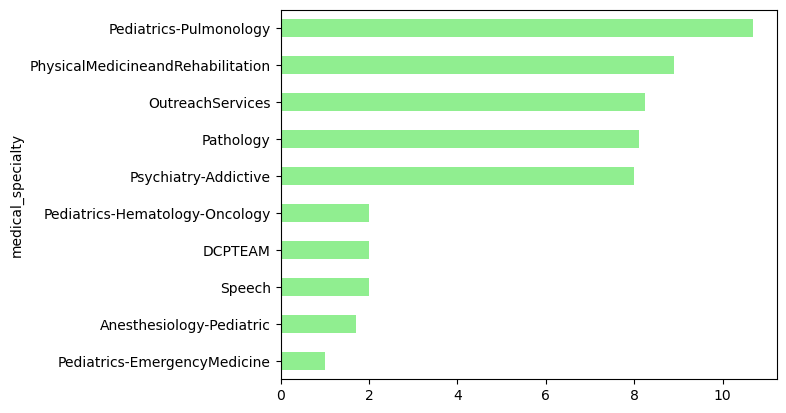

In [10]:
# Calculate average LOS per specialty and sort
specialty_group = df.groupby('medical_specialty')['time_in_hospital'].mean().sort_values()
# Plot top 5 and bottom 5 for clarity
top_bottom_specialties = pd.concat([specialty_group.head(5), specialty_group.tail(5)])
top_bottom_specialties.plot(kind='barh', color='lightgreen')

# Emergency Visits & Readmissions

Correlation: 0.10781973814091467


<Axes: xlabel='emergency_bins'>

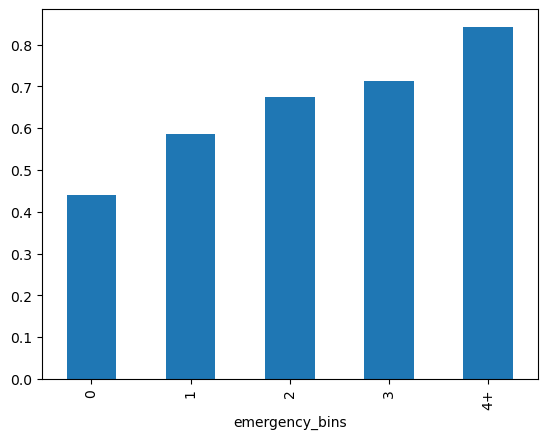

In [11]:
# Correlation
corr_emerg = df['number_emergency'].corr(df['readmitted'])
print(f"Correlation: {corr_emerg}")

# Visualization by binning (0, 1, 2, 3, 4+)
df['emergency_bins'] = df['number_emergency'].apply(lambda x: str(x) if x < 4 else '4+')
df.groupby('emergency_bins')['readmitted'].mean().plot(kind='bar')

# Diabetes & Readmission

<Axes: xlabel='diabetesMed'>

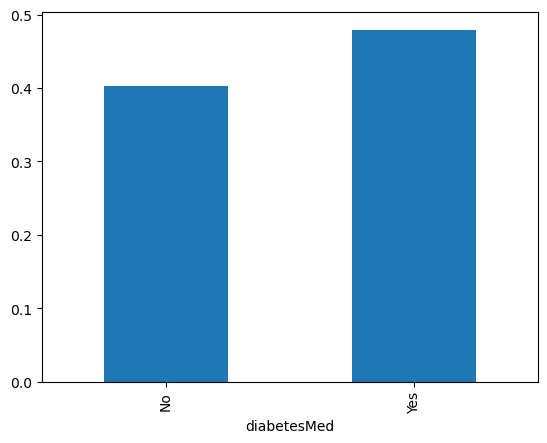

In [12]:
diabetes_group = df.groupby('diabetesMed')['readmitted'].mean()
diabetes_group.plot(kind='bar')

# Medication Change Impact

<Axes: xlabel='change'>

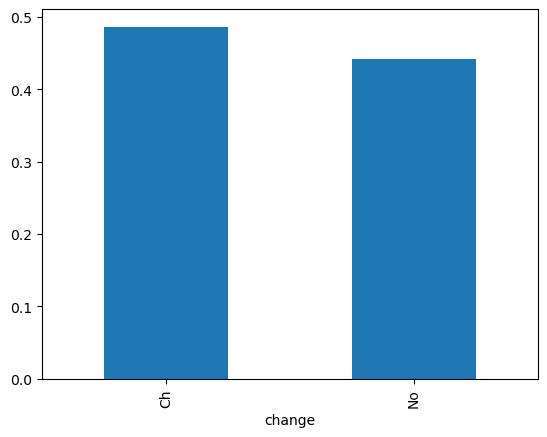

In [13]:
change_group = df.groupby('change')['readmitted'].mean()
change_group.plot(kind='bar')

# Lab Procedures vs Readmission

<Axes: xlabel='readmitted', ylabel='num_lab_procedures'>

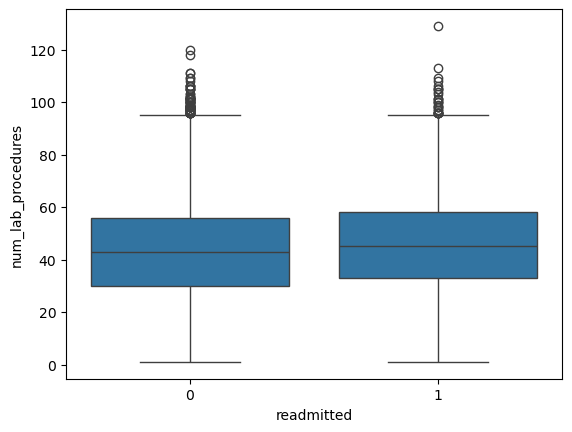

In [14]:
sns.boxplot(x='readmitted', y='num_lab_procedures', data=df)

# Demographics: Race & Gender

<Axes: xlabel='gender', ylabel='race'>

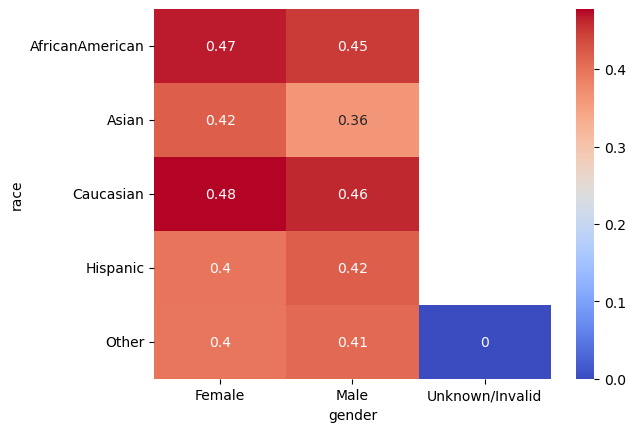

In [15]:
race_gender_group = df.groupby(['race', 'gender'])['readmitted'].mean().unstack()
sns.heatmap(race_gender_group, annot=True, cmap='coolwarm')

# Weight & Readmission

<Axes: xlabel='weight'>

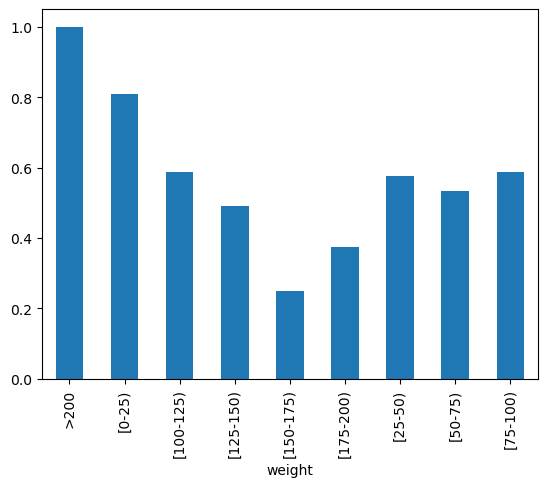

In [16]:
weight_group = df.groupby('weight')['readmitted'].mean()
weight_group.plot(kind='bar')

# Number of Medications vs LOS

Correlation: 0.4660177870433091


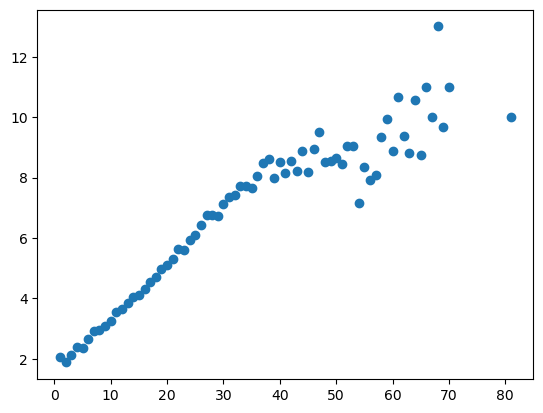

In [17]:
# Correlation
corr_meds_los = df['num_medications'].corr(df['time_in_hospital'])
print(f"Correlation: {corr_meds_los}")

# Visualization
med_los_group = df.groupby('num_medications')['time_in_hospital'].mean()
plt.scatter(med_los_group.index, med_los_group.values)

# Outpatient Visits

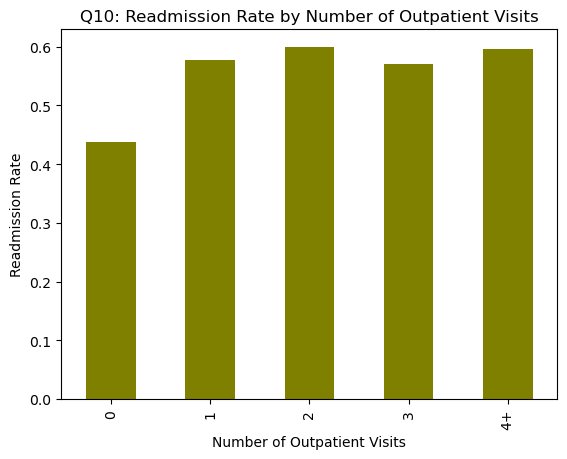

In [19]:
# Create the bins first
df['outpatient_bins'] = df['number_outpatient'].apply(lambda x: str(x) if x < 4 else '4+')

# Now perform the grouping and plotting
outpatient_group = df.groupby('outpatient_bins')['readmitted'].mean()
outpatient_group.plot(kind='bar', color='olive')
plt.title('Q10: Readmission Rate by Number of Outpatient Visits')
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Readmission Rate')
plt.show()

# Summary
Prior Utilization: High number of emergency and outpatient visits in the previous year.

Age: Older age groups (>70 years).

Medication Factors: Being on diabetes medication and having medication adjustments during the stay.

Complexity: While lab procedures didn't correlate strongly, the number of medications (proxy for complexity) correlated strongly with Length of Stay.